In [2]:
!wget https://raw.githubusercontent.com/alirezadir/Machine-Learning-Interviews/refs/heads/main/src/MLC/notebooks/linear_regression.ipynb

--2025-05-03 02:05:29--  https://raw.githubusercontent.com/alirezadir/Machine-Learning-Interviews/refs/heads/main/src/MLC/notebooks/linear_regression.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23591 (23K) [text/plain]
Saving to: ‘linear_regression.ipynb.1’

linear_regression.i 100%[===================>]  23.04K  --.-KB/s    in 0.001s  

2025-05-03 02:05:29 (30.6 MB/s) - ‘linear_regression.ipynb.1’ saved [23591/23591]



## [Ref](https://github.com/alirezadir/Machine-Learning-Interviews/tree/main/src/MLC/notebooks) @alirezadir/Machine-Learning-Interviews/

# Linear Regression 

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as "y") and one or more independent variables (often denoted as "x"). The basic idea of linear regression is to find the straight line that best fits the data points in a scatter plot.

The most common form of linear regression is simple linear regression, which models the relationship between two variables:

$y = mx + b$

where y is the dependent variable, x is the independent variable, m is the slope, and b is the intercept. 

Given a set of input data ($\{x_i, y_i\}$), the goal of linear regression is to find the values of m and b that best fit the data


The values of m and b are chosen to minimize the "sum of squared errors" (SSE) $(\sum (y - \hat{y})^2)$.

Taking the partial derivatives with respect to m and b, set them equal to 0, and solve for m and b, we get:

m = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean)^2)   
b =  y_mean - m * x_mean


Multiple linear regression is a more general form of linear regression that models the relationship between multiple independent variables and one dependent variable. The formula for the best-fit hyperplane in multiple linear regression is:

$y = w_0 + w_1.x_1 + w_2.x_2 + ... + w_n.x_n = X^T. W$

In [2]:
import numpy as np

In [5]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

In [7]:
m = sum((X-np.mean(X))*(y-np.mean(y))) / sum((X-np.mean(X)**2))
m 

np.float64(-0.2)

In [8]:
m = sum((y-np.mean(y))) / sum((X-np.mean(X)))
m 

/tmp/ipykernel_732/1177965158.py:1: RuntimeWarning: invalid value encountered in scalar divide
  m = sum((y-np.mean(y))) / sum((X-np.mean(X)))


np.float64(nan)

In [9]:
X-np.mean(X)

array([-2., -1.,  0.,  1.,  2.])

In [32]:
class LinearRegression():
    def __init__(self):
        self.slope = None
        self.intercept = None
    def fit(self,X,y):
        #self.slope = sum((X-np.mean(X))*(y-np.mean(y))) / sum((X-np.mean(X)**2))
        #self.intercept= np.mean(y) - self.slope*np.mean(X)
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        numerator, denominator = 0,0
        for i in range(len(X)):
            numerator += (X[i]-x_mean)*(y[i] - y_mean)
            denominator += (X[i]-x_mean)**2
        #numerator = sum((X-x_mean) * (y-y_mean))
        #denominator = sum((X-x_mean)**2)
        self.slope = numerator/denominator
        self.intercept = y_mean - self.slope*x_mean
    def predict(self, X):
        pred = []
        for i in range(len(X)):
            res = X[i]*self.slope + self.intercept
            pred.append(res)
        return pred

In [33]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X, y)
print(lr.slope)  # Output: 0.6
print(lr.intercept)  # Output: 2.2
y_pred = lr.predict(X)
str_array = [f"{x:.2f}" for x in y_pred]
print(str_array)

0.6
2.2
['2.80', '3.40', '4.00', '4.60', '5.20']


In [ ]:
# Output: [2.8, 3.4, 4.0, 4.6, 5.2]


## Vectorized

$y = X.W$  
$W = (X^T.X)^{-1}X^T.y $

In [36]:
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [37]:
# @ means np.matmul

In [30]:
class LinearRegression():
    def __init__(self):
        self.W = None
    def fit(self, X, y):
        n = X.shape[0]
        X = np.hstack([np.ones((n,1)),X])
        self.W = np.linalg.inv(X.T @ X) @ X.T @ y
    def predict(self, X):
        n = X.shape[0]
        X = np.hstack([np.ones((n,1)),X])
        return X @ self.W

In [31]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X, y)
print(lr.W)  # Output: (bias, w)= 2.2, 0.6
y_pred = lr.predict(X)
str_array = [f"{x:.2f}" for x in y_pred]
print(str_array)

[2.2 0.6]
['2.80', '3.40', '4.00', '4.60', '5.20']


### Improvements 
here are some improvements to the simple linear regression implementation to make it more robust:

1. Add input **validation**: Add input validation to check that the input arrays X and y have the same length and are not empty.

2. Use NumPy broadcasting: Instead of looping through the data to calculate the numerator and denominator, we can use NumPy broadcasting to perform the calculations in a vectorized way. This will make the code faster and more efficient.

3. Add **regularization**: Regularization can help prevent overfitting by adding a penalty term to the cost function. One common regularization technique is L2 regularization, which adds the sum of squares of the coefficients to the cost function. This can be easily added to the code by adding a regularization parameter to the constructor.

4. Use **gradient descent**: For large datasets, calculating the inverse of the matrix in the normal equation can be computationally expensive. To overcome this, we can use gradient descent to minimize the cost function. This can be implemented by adding a method that updates the coefficients iteratively using the gradient descent algorithm.

Here's the updated code that incorporates these improvements:

In [5]:
np.zeros((4,1))

array([[0.],
       [0.],
       [0.],
       [0.]])

In [32]:
class LinearRegression():
    def __init__(self, reg):
        self.reg = reg
        self.W = None

    def fit(self,X,y, lr= 0.01,num_iter =1000):
        n = X.shape[0]
        if n!= len(y):
            raise ValueError("X and y must have the same length and cannot be empty")
        X = np.hstack([np.ones((n,1)),X])
        self.W = np.zeros(X.shape[1])
        for i in range(num_iter):
            y_pred = np.dot(X,self.W)
            cost = np.sum((y_pred - y) ** 2) + self.reg * np.sum(self.W ** 2)
            gradient = 2*np.dot(X.T,(y_pred -y)) + 2 * self.reg * self.W
            self.W = self.W - lr*gradient
            if (i % 100 == 0 ): 
                print(cost)
    def predict(self, X):
        n = X.shape[0]
        X = np.hstack([np.ones((n,1)),X])
        y_pred = np.dot(X,self.W)
        return y_pred

In [33]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression(0.01)
lr.fit(X, y )
print(lr.W)  # Output: (bias, w)= 2.2, 0.6
y_pred = lr.predict(X)
str_array = [f"{x:.2f}" for x in y_pred]
print(str_array)

86.0
2.553368264631959
2.4547790458769203
2.451651012832223
2.451551766780248
2.451548617907236
2.451548517999975
2.4515485148301255
2.4515485147295517
2.451548514726361
[2.17786125 0.60592767]
['2.78', '3.39', '4.00', '4.60', '5.21']


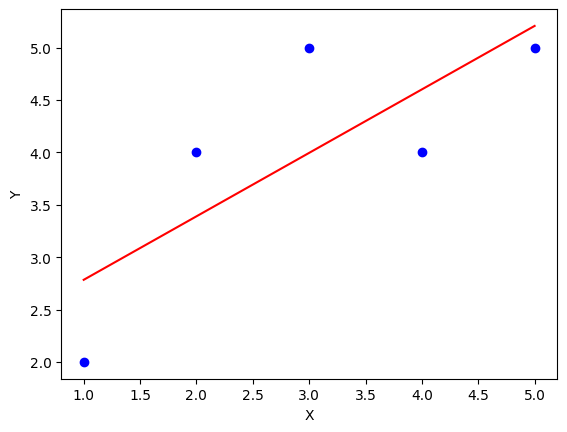

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X,y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()